In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.legend_handler import HandlerTuple

sns.set_theme(style="darkgrid")

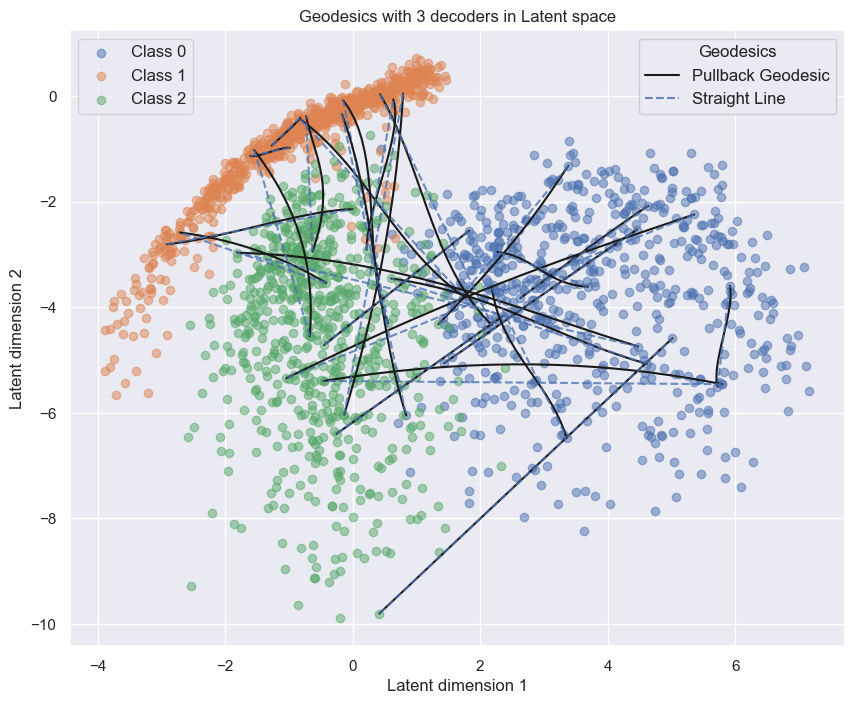

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))


geodesic_coords_saved = np.load("geodesics.npy")
latent = np.load("latents.npy")
labels = np.load("labels.npy")

grp1_idx = np.where(labels == 0)[0]
grp2_idx = np.where(labels == 1)[0]
grp3_idx = np.where(labels == 2)[0]

grp1_latent = latent[grp1_idx]
grp2_latent = latent[grp2_idx]
grp3_latent = latent[grp3_idx]
for i in range(3):
    idx = np.where(labels == i)[0]
    latent_i = latent[idx]
    plt.scatter(latent_i[:, 0], latent_i[:, 1], label=f'Class {i}', alpha=0.5)

ax.set_title("Geodesics with 3 decoders in Latent space")
ax.set_xlabel("Latent dimension 1")
ax.set_ylabel("Latent dimension 2")
leg1 = ax.legend(loc='upper left', fontsize=12)


for geodesic_coords in geodesic_coords_saved:
    pg_plot = plt.plot(geodesic_coords[:, 0], geodesic_coords[:, 1], "-k", label='Pullback Geodesic')
    sl_plot = plt.plot([geodesic_coords[0, 0], geodesic_coords[-1, 0]], 
                       [geodesic_coords[0, 1], geodesic_coords[-1, 1]], 
                       "--b", label='Straight Line', alpha=0.8)
pg_sl_legend = [pg_plot[0], sl_plot[0]]
pg_sl_labels = ["Pullback Geodesic", "Straight Line"]

leg2 = ax.legend(pg_sl_legend, pg_sl_labels, loc='upper right', fontsize=12, title="Geodesics")
ax.add_artist(leg1)
ax.add_artist(leg2)

plt.show()